### 1. Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 2. Đọc bộ dữ liệu

In [2]:
dataset_path = './Housing.csv'
df = pd.read_csv(dataset_path)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### 3. Xử lý dữ liệu categorical

In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()
print(categorical_cols)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [7]:
ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(
    df[categorical_cols]
)
encoded_categorical_df = pd.DataFrame(
    encoded_categorical_cols,
    columns=categorical_cols
)
numerical_df = df.drop(categorical_cols, axis=1)
encoded_df = pd.concat(
    [numerical_df, encoded_categorical_df], axis=1
)

In [8]:
encoded_df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0


### 4. Chuẩn hóa bộ dữ liệu

In [9]:
normalizer = StandardScaler()
dataset_arr = normalizer.fit_transform(encoded_df)
dataset_arr

array([[ 4.56636513,  1.04672629,  1.40341936, ...,  1.4726183 ,
         1.80494113, -1.40628573],
       [ 4.00448405,  1.75700953,  1.40341936, ...,  1.4726183 ,
        -0.55403469, -1.40628573],
       [ 4.00448405,  2.21823241,  0.04727831, ..., -0.67906259,
         1.80494113, -0.09166185],
       ...,
       [-1.61432675, -0.70592066, -1.30886273, ..., -0.67906259,
        -0.55403469,  1.22296203],
       [-1.61432675, -1.03338891,  0.04727831, ..., -0.67906259,
        -0.55403469, -1.40628573],
       [-1.61432675, -0.5998394 ,  0.04727831, ..., -0.67906259,
        -0.55403469,  1.22296203]])

### 5. Tách dữ liệu X, y

In [10]:
X, y = dataset_arr[:, 1:], dataset_arr[:, 0]

In [11]:
len(X)

545

In [12]:
len(X[0])

12

In [13]:
y[0]

4.566365125868969

### 6. Chia tập dữ liệu train, val

In [14]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=test_size, 
    random_state=random_state,
    shuffle=is_shuffle
)

### 7. Huấn luyện mô hình

#### Random Forest: RandomForestRegressor()

In [15]:
rf_regressor = RandomForestRegressor(
    random_state=random_state
)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

#### AdaBoost: AdaBoostRegressor()

In [16]:
AdaBoost_regressor = AdaBoostRegressor(
    random_state=random_state
)
AdaBoost_regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

#### Gradient Boosting: GradientBoostingRegressor()

In [17]:
gradient_boosting_regressor = GradientBoostingRegressor(
    random_state=random_state
)
gradient_boosting_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

### 8. Đánh giá mô hình

In [18]:
# random forest regressor
y_pred_rf = rf_regressor.predict(X_val)

# adaBoost regressor
y_pred_AdaBoost = AdaBoost_regressor.predict(X_val)

# gradient boosting regressor
y_pred_gradient_boosting = gradient_boosting_regressor.predict(X_val)

In [19]:
mae_rf = mean_absolute_error(y_val, y_pred_rf)
mse_rf = mean_squared_error(y_val, y_pred_rf)

print('Evaluation results on validation set:')
print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')

Evaluation results on validation set:
Mean Absolute Error: 0.46093873321571177
Mean Squared Error: 0.37944418523089524


In [20]:
mae_AdaBoost = mean_absolute_error(y_val, y_pred_AdaBoost)
mse_AdaBoost = mean_squared_error(y_val, y_pred_AdaBoost)

print('Evaluation results on validation set:')
print(f'Mean Absolute Error: {mae_AdaBoost}')
print(f'Mean Squared Error: {mse_AdaBoost}')

Evaluation results on validation set:
Mean Absolute Error: 0.567680019897059
Mean Squared Error: 0.5739244030038942


In [21]:
mae_gradient_boosting = mean_absolute_error(y_val, y_pred_gradient_boosting)
mse_gradient_boosting = mean_squared_error(y_val, y_pred_gradient_boosting)

print('Evaluation results on validation set of Gradient Boosting :')
print(f'Mean Absolute Error: {mae_gradient_boosting}')
print(f'Mean Squared Error: {mse_gradient_boosting}')

Evaluation results on validation set of Gradient Boosting :
Mean Absolute Error: 0.4516626127750995
Mean Squared Error: 0.39610445936979427


(0.0, 1.0)

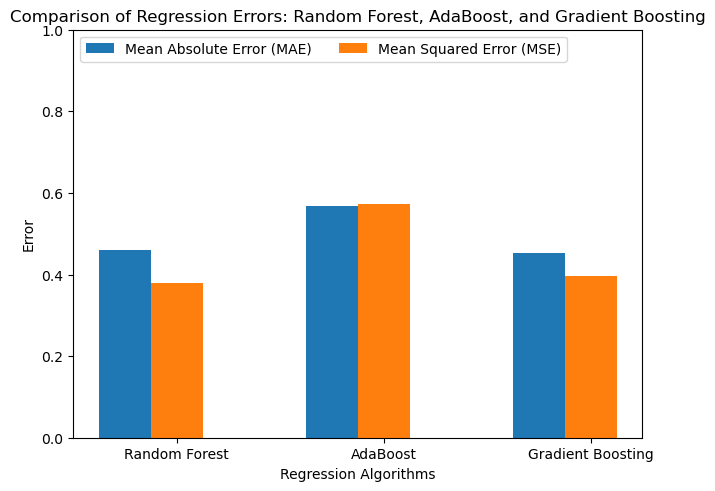

In [22]:
species = ("Random Forest", "AdaBoost", "Gradient Boosting")
error = {
    'Mean Absolute Error (MAE)': (mae_rf, mae_AdaBoost, mae_gradient_boosting),
    'Mean Squared Error (MSE)': (mse_rf, mse_AdaBoost, mse_gradient_boosting),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in error.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error')
ax.set_xlabel('Regression Algorithms')
ax.set_title('Comparison of Regression Errors: Random Forest, AdaBoost, and Gradient Boosting')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 1)

In [23]:
dt_regressor = DecisionTreeRegressor(
    random_state=random_state
)
dt_regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=1)

In [24]:
y_pred = dt_regressor.predict(X_val)
mean_squared_error(y_val, y_pred)

0.7245255619360014

In [25]:
data = np.array([[3, 12],
        [5, 20],
        [8, 28],
        [10, 32],
        [12, 36]])

X = data[:, 0]
y = data[:, 1]
X

array([ 3,  5,  8, 10, 12])

In [26]:
def mse(y_test, y_pred): 
    return np.sum((y_test - y_pred) ** 2) / len(y_test)

In [31]:
arr_mse = []
for i in X: 
    data_left = data[X <= i][:, 1]
    data_right = data[X > i][:, 1]
    
    if len(data_right) == 0:
        data_right= np.array([0])

    mean_left = data_left.mean()
    mean_right = data_right.mean()
    
    mse_left = mse(data_left, mean_left)
    mse_right = mse(data_right, mean_right)
    sum_mse = mse_left + mse_right
    arr_mse.append(sum_mse)
print(arr_mse)
index = np.array(arr_mse).argmin()
X[index]

[0]
0.0
0.0
[35.0, 26.666666666666664, 46.666666666666664, 59.0, 74.24]


5

In [28]:
(28+32+36)/3

32.0